In [81]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('fivethirtyeight')

## Import the Data

In [82]:
shark_raw = pd.read_csv('data/attacks.csv')
shark_raw.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2017.11.30.b,30-Nov-2017,2017.0,Unprovoked,COSTA RICA,Cocos Island,Manuelita,Scuba Diving,__ Jimenez,M,...,"Tiger shark, female",R. Arauz,2017.11.30.b-Jimenez.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.30.b,2017.11.30.b,6221.0,NaN,NaN
1,2017.11.30.a,30-Nov-2017,2017.0,Unprovoked,COSTA RICA,Cocos Island,Manuelita,Scuba diving,Rohina Bhandari,F,...,"Tiger shark, female",R. Arauz,2017.11.30.a-Bhandari.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.30.a,2017.11.30.a,6220.0,NaN,NaN
2,2017.11.25.R,Reported 25-Nov-2017,2017.0,Sea Disaster,LIBYA,NaN,Gars Garabulli,2 boats capsized,31 migrants,NaN,...,Some drowned but other may have been killed by...,"TG Com 24, 11/25/2017",2017.11.25.R-Libya.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.25.R,2017.11.25.R,6219.0,NaN,NaN
3,2017.11.24,24-Nov-2017,2017.0,Unprovoked,USA,California,"Stillwater Cove, Monterey County",Spearfishing,Grigor Azatian,M,...,"White shark, 4.6 m","R. Collier, GSAF",2017.11.24-Azatian.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.24,2017.11.24,6218.0,NaN,NaN
4,2017.11.18,18-Nov-2017,2017.0,Unprovoked,USA,Florida,"Floridana Beach, Brevard County",Surfing,Kaia Anderson,F,...,NaN,"Florida Today, 11/21/2017",2017.11.18-Anderson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.18,2017.11.18,6217.0,NaN,NaN


In [83]:
# Remove Rows without any Sort of Locatio
shark_raw.dropna(subset = ['Country', 'Area', 'Location']
                 , how = 'all'
                 , inplace = True)

In [84]:
indexes = shark_raw['Country'].index[shark_raw['Country'].isnull()]
area_indexes = shark_raw['Area'].index[shark_raw['Area'].isnull()]
location_indexes = shark_raw['Location'].index[shark_raw['Location'].isnull()]

In [85]:
len(shark_raw.loc[indexes, ['Country']])

21

In [89]:
len(shark_raw.loc[area_indexes, ['Area']])

415

In [90]:
len(shark_raw.loc[location_indexes, ['Location']])

507

In [91]:
shark_raw.loc[indexes, ['Country']] = ''
shark_raw.loc[area_indexes, ['Area']] = ''
shark_raw.loc[location_indexes, ['Location']] = ''

In [92]:
shark_raw[shark_raw['Area'] == 'California']

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
3,2017.11.24,24-Nov-2017,2017.0,Unprovoked,USA,California,"Stillwater Cove, Monterey County",Spearfishing,Grigor Azatian,M,...,"White shark, 4.6 m","R. Collier, GSAF",2017.11.24-Azatian.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.24,2017.11.24,6218.0,NaN,NaN
46,2017.08.01,01-Aug-2017,2017.0,Boating,USA,California,"Between Pescadero Point & Bean Hollow Beach, S...",Kayaking / Fishing,Patrick Conroy,M,...,"White shark, 10'","R. Collier, GSAF",2017.08.01-Conroy.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.08.01,2017.08.01,6175.0,NaN,NaN
56,2017.07.20.b,20-Jul-2017,2017.0,Boating,USA,California,"Stearns Wharf, Santa Barbara",Kayaking,Bret Jackson,M,...,"White shark, 11' to 13'","R. Collier, GSAF",2017.07.20.b-Jackson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.20.b,2017.07.20.b,6165.0,NaN,NaN
57,2017.07.20.a,20-Jul-2017,2017.0,Unprovoked,USA,California,"Seal Rock, Goleta Beach, Santa Barbara",SUP,Rolf Geyling,M,...,"White shark, 8' to 10'","R. Collier, GSAF",2017.07.20.a-Geyling.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017/07.20.a,2017.07.20.a,6164.0,NaN,NaN
59,2017.07.11,11-Jul-2017,2017.0,Boating,USA,California,"Santa Cruz, Santa Cruz County",Kayaking,Steve Lawson,M,...,White shark,"R. Collier, GSAF",2017.07.11-Lawson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.07.11,2017.07.11,6162.0,NaN,NaN
83,2017.05.03,03-May-2017,2017.0,Invalid,USA,California,"Sunset Beach, Orange County",Surfing,Sophia Raab,F,...,Shark involvement highly doubtful,"R. Collier, GSAF",2017.05.03-Raab.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.05.03,2017.05.03,6138.0,NaN,NaN
84,2017.04.29.d,29-Apr-2017,2017.0,Unprovoked,USA,California,"San Onofre, San Diego County",Swimming,Leeanne Ericson,F,...,NaN,"R. Collier, GSAF",2017.04.29.d-Ericson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.04.29.d,2017.04.29.d,6137.0,NaN,NaN
107,2017.03.18,18-Mar-2017,2017.0,Boating,USA,California,Monterey Bay,Kayaking,Brian Correira,M,...,White shark,"R. Collier, GSAF",2017.03.18-Correira.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.03.18,2017.03.18,6114.0,NaN,NaN
150,2016.09.17.b,17-Sep-2016,2016.0,Unprovoked,USA,California,"Bunkers, Humboldt Bay, Eureka, Humboldt County",Surfing,Yuma,M,...,NaN,"R. Collier, GSAF",2016.09.17.b-Yuma.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.17.b,2016.09.17.b,6071.0,NaN,NaN
160,2016.09.01,01-Sep-2016,2016.0,Unprovoked,USA,California,"Refugio State Beach, Santa Barbara County",Spearfishing,Tyler McQuillen,M,...,"White shark, 8' to 10'","R. Collier, GSAF",2016.09.01-McQuillen.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.09.01,2016.09.01,6061.0,NaN,NaN


## Clean Addresses

In [13]:
len(shark_raw)

25687

In [14]:
shark_raw = shark_raw[['Country', 'Area', 'Location']].dropna(axis = 0, how = 'all'))

SyntaxError: invalid syntax (<ipython-input-14-082f2bce108f>, line 1)

## Examine Column Names

In [5]:
shark_raw.columns

Index([u'Case Number', u'Date', u'Year', u'Type', u'Country', u'Area',
       u'Location', u'Activity', u'Name', u'Sex ', u'Age', u'Injury',
       u'Fatal (Y/N)', u'Time', u'Species ', u'Investigator or Source', u'pdf',
       u'href formula', u'href', u'Case Number.1', u'Case Number.2',
       u'original order', u'Unnamed: 22', u'Unnamed: 23'],
      dtype='object')

## Remove Unwanted Columns

In [62]:
shark_col_clean = shark_raw.drop(['Unnamed: 22', 'Unnamed: 23'], axis=1)

#### Rename variable names that contain spaces or special characters

In [63]:
shark_col_clean.rename(columns={'Fatal (Y/N)': 'Fatal', 'Species ': 'Shark', 'Sex ':'Sex'}, inplace=True)

#### Filter to only United States attacks to simplify dataset

In [64]:
shark_usa = shark_col_clean[(shark_col_clean.Country == 'USA')]     

shark_usa = shark_usa.drop(['Country'], axis=1)

shark_usa.head(5)                  

,Case Number,Date,Year,Type,Area,Location,Activity,Name,Sex,Age,...,Fatal,Time,Shark,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
3,2017.11.24,24-Nov-2017,2017.0,Unprovoked,California,"Stillwater Cove, Monterey County",Spearfishing,Grigor Azatian,M,25,...,N,13h45,"White shark, 4.6 m","R. Collier, GSAF",2017.11.24-Azatian.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.24,2017.11.24,6218.0
4,2017.11.18,18-Nov-2017,2017.0,Unprovoked,Florida,"Floridana Beach, Brevard County",Surfing,Kaia Anderson,F,14,...,N,Late afternoon,NaN,"Florida Today, 11/21/2017",2017.11.18-Anderson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.18,2017.11.18,6217.0
10,2017.10.26,26-Oct-2017,2017.0,Unprovoked,Hawaii,"White Plains Beach, Oahu",Stand-Up Paddleboarding,male,M,NaN,...,N,15h00,NaN,"Hawaii News Now, 10/27/2017",2017.10.26-Oahu.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.10.26,2017.10.26,6211.0
12,2017.10.23.b,23-Oct-2017,2017.0,Unprovoked,Florida,"Juno Beach, Palm Beach County",Surfing,Jason Hartl,M,17,...,N,17h00,NaN,"WPBF News, 10/24/2017",2017.10.23.b-Hartl.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.10.23.b,2017.10.23.b,6209.0
13,2017.10.23.a,23-Oct-2017,2017.0,Unprovoked,Florida,"Ocean Reef Park, Singer Island, Palm Beach County",Swimming,Susan Peteka,F,60,...,N,08h00,NaN,"Palm Beach Post, 11/1/2017",2017.10.23.a-Peteka.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.10.23.a,2017.10.23.a,6208.0


## Identify missing data

In [65]:
print(shark_usa.isnull().sum())

Case Number                 1
Date                        0
Year                        0
Type                        0
Area                        4
Location                   50
Activity                  134
Name                       30
Sex                        98
Age                       724
Injury                      5
Fatal                     119
Time                      839
Shark                     898
Investigator or Source      7
pdf                         0
href formula                0
href                        0
Case Number.1               0
Case Number.2               0
original order              0
dtype: int64


#### Replace null values with "Unknown" for Shark variable, but otherwise delete observations with any missing data

In [66]:
shark_usa.Shark.fillna(value='Unknown', inplace=True)

shark_usa1 = shark_usa.dropna()

shark_usa1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1084 entries, 3 to 5857
Data columns (total 21 columns):
Case Number               1084 non-null object
Date                      1084 non-null object
Year                      1084 non-null float64
Type                      1084 non-null object
Area                      1084 non-null object
Location                  1084 non-null object
Activity                  1084 non-null object
Name                      1084 non-null object
Sex                       1084 non-null object
Age                       1084 non-null object
Injury                    1084 non-null object
Fatal                     1084 non-null object
Time                      1084 non-null object
Shark                     1084 non-null object
Investigator or Source    1084 non-null object
pdf                       1084 non-null object
href formula              1084 non-null object
href                      1084 non-null object
Case Number.1             1084 non-null object

#### Check Fatal variable, make data consistent


In [67]:
shark_usa1['Fatal'].value_counts()

N          1026
Y            57
UNKNOWN       1
Name: Fatal, dtype: int64

In [68]:
shark_usa2 = shark_usa1[(shark_usa1.Fatal == 'N') | (shark_usa1.Fatal == 'Y')]

shark_usa2['Fatal'].value_counts()

N    1026
Y      57
Name: Fatal, dtype: int64

#### Check Type variable, make data consistent

In [69]:
shark_usa2['Type'].value_counts()

Unprovoked      987
Provoked         55
Invalid          25
Boating          10
Sea Disaster      6
Name: Type, dtype: int64

In [70]:
shark_usa3 = shark_usa2[(shark_usa2.Type != 'Invalid')]

shark_usa3.Type.replace('Sea Disaster', 'Unprovoked', inplace=True)
shark_usa3.Type.replace('Boat', 'Unprovoked', inplace=True)
shark_usa3['Type'].value_counts()

Unprovoked    993
Provoked       55
Boating        10
Name: Type, dtype: int64

#### From free form text in Activity field, use key words to categorize and mine the text to create Activity_Category, grouping similar activities together

In [71]:
shark_usa3.loc[shark_usa3['Activity'].str.contains('surf', case=False), 'Activity_category'] = 'Surfing'
shark_usa3.loc[shark_usa3['Activity'].str.contains('swim', case=False), 'Activity_category'] = 'Swimming'
shark_usa3.loc[shark_usa3['Activity'].str.contains('wading', case=False), 'Activity_category'] = 'Swimming'
shark_usa3.loc[shark_usa3['Activity'].str.contains('float', case=False), 'Activity_category'] = 'Swimming'
shark_usa3.loc[shark_usa3['Activity'].str.contains('play', case=False), 'Activity_category'] = 'Swimming'
shark_usa3.loc[shark_usa3['Activity'].str.contains('walk', case=False), 'Activity_category'] = 'Swimming'
shark_usa3.loc[shark_usa3['Activity'].str.contains('bath', case=False), 'Activity_category'] = 'Swimming'
shark_usa3.loc[shark_usa3['Activity'].str.contains('stand', case=False), 'Activity_category'] = 'Swimming'
shark_usa3.loc[shark_usa3['Activity'].str.contains('paddle', case=False), 'Activity_category'] = 'Boarding'
shark_usa3.loc[shark_usa3['Activity'].str.contains('boogie', case=False), 'Activity_category'] = 'Boarding'
shark_usa3.loc[shark_usa3['Activity'].str.contains('body', case=False), 'Activity_category'] = 'Boarding'
shark_usa3.loc[shark_usa3['Activity'].str.contains('board', case=False), 'Activity_category'] = 'Boarding'
shark_usa3.loc[shark_usa3['Activity'].str.contains('snork', case=False), 'Activity_category'] = 'Snorkeling/Diving'
shark_usa3.loc[shark_usa3['Activity'].str.contains('scuba', case=False), 'Activity_category'] = 'Snorkeling/Diving'
shark_usa3.loc[shark_usa3['Activity'].str.contains('diving', case=False), 'Activity_category'] = 'Snorkeling/Diving'
shark_usa3.loc[shark_usa3['Activity'].str.contains('photo', case=False), 'Activity_category'] = 'Snorkeling/Diving'
shark_usa3.loc[shark_usa3['Activity'].str.contains('fishing', case=False), 'Activity_category'] = 'Fishing'
shark_usa3.loc[shark_usa3['Activity'].str.contains('raft', case=False), 'Activity_category'] = 'Boating'
shark_usa3.loc[shark_usa3['Activity'].str.contains('boat', case=False), 'Activity_category'] = 'Boating'
shark_usa3.loc[shark_usa3['Activity'].str.contains('overboard', case=False), 'Activity_category'] = 'Boating'

shark_usa3.tail(12)


,Case Number,Date,Year,Type,Area,Location,Activity,Name,Sex,Age,...,Time,Shark,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Activity_category
4824,1935.09.21,21-Sep-1935,1935.0,Unprovoked,North Carolina,"Brown�s Inlet on New River, Onslow Beach",Swimming,Jere W. Fountain,M,38,...,20h30,Unknown,"F. Schwartz, p.23; C. Creswell, GSAF",1935.09.21-Fountain.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1935.09.21,1935.09.21,1397.0,Swimming
5006,1929.03.16,16-Mar-1929,1929.0,Unprovoked,Florida,"Sea Spray, Palm Beach",Swimming,Leroy Chadbourne,M,26,...,12h00,Unknown,"New York Herald Tribune, 3/17/1929 edtion; H. ...",1929.03.16-Chadbourne.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1929.03.16,1929.03.16,1215.0,Swimming
5077,1926.07.08,08-Jul-1926,1926.0,Unprovoked,California,"San Francisco Bay (or San Leandro Bay), near c...",Swimming with dog near canning factory,Norman Piexotto,M,15,...,,1.5 m [5'] white shark or sevengill shark,"D. Miller & R. Collier, R. Collier, p. __; V.M...",1926.07.08-Peixotto_Collier.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1926.07.08,1926.07.08,1144.0,Swimming
5105,1924.11.21,21-Nov-1924,1924.0,Unprovoked,Puerto Rico,Santurce,Bathing,Professor Winslow,M,35,...,Late afternon,Unknown,"R. W. Kramer; V.M. Coppleson (1958), pp.48 & 264",1924.11.21-Winslow.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1924.11.21,1924.11.21,1116.0,Swimming
5182,1920.06.29,29-Jun-1920,1920.0,Unprovoked,Florida,"Englewood Beach, Charlotte County",Swimming,Hayward Green,M,13,...,18h30,Unknown,"E. Clark, GSAF",1920.06.29-Green.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1920.06.29,1920.06.29,1039.0,Swimming
5235,1916.07.12.a,12-Jul-1916,1916.0,Unprovoked,New Jersey,"Matawan Creek, 10 miles from the sea, Monmouth...",Swimming,Lester Stillwell,M,10,...,A.M.,Unknown,"R. Fernicola, GSAF",1916.07.12.a-b-Stillwell-Fisher.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1916.07.12.a,1916.07.12.a,986.0,Swimming
5240,1916.07.01,01-Jul-1916,1916.0,Unprovoked,New Jersey,"Beach Haven, Ocean County",Swimming,Charles E. Vansant,M,24,...,17h00,Thought to involve a 2.6 m [8.5'] white shark,"R. Fernicola, GSAF",1916.07.01-Vansant.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1916.07.01,1916.07.01,981.0,Swimming
5419,1905.07.29,29-Jul-1905,1905.0,Unprovoked,North Carolina,"Davis Shore, east of Beaufor, Carteret Countyt",Wading,Sutton Davis,M,16,...,Afternoon,Unknown,"C. Creswell, GSAF; F. Schwartz, p.23",1905.07.29-Davis.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.07.29,1905.07.29,802.0,Swimming
5546,1896.07.25,25-Jul-1896,1896.0,Unprovoked,Hawaii,"Kahului, Maui",Fishing,Nahalehau,M,35,...,10h30,Unknown,"Hawaiian Gazette, 8/4/1896",1896.07.25-Nahalehau.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1896.07.25,1896.07.25,675.0,Fishing
5557,1895.08.11,11-Aug-1895,1895.0,Unprovoked,Rhode Island,Noyes Beach,Swimming,Charles Beattie,M,26,...,05h00,Unknown,Boston Globe,1895.08.11-Beattie.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1895.08.11,1895.08.11,664.0,Swimming


In [72]:
shark_usa4 = shark_usa3.drop(['Activity'], axis=1)
shark_usa4.Activity_category.fillna(value='Other', inplace=True)

shark_usa4.Activity_category.value_counts()

Surfing              397
Swimming             343
Boarding             109
Snorkeling/Diving     77
Fishing               75
Other                 44
Boating               13
Name: Activity_category, dtype: int64

#### Use the Time variable to determine Time of Day, so instead of an exact hour:minute number, there are 5 buckets

In [73]:
shark_usa4.loc[shark_usa4['Time'].str.contains('04h', case=False), 'Time_of_day'] = 'Early Morning'
shark_usa4.loc[shark_usa4['Time'].str.contains('05h', case=False), 'Time_of_day'] = 'Early Morning'
shark_usa4.loc[shark_usa4['Time'].str.contains('06h', case=False), 'Time_of_day'] = 'Early Morning'
shark_usa4.loc[shark_usa4['Time'].str.contains('07h', case=False), 'Time_of_day'] = 'Early Morning'
shark_usa4.loc[shark_usa4['Time'].str.contains('08h', case=False), 'Time_of_day'] = 'Morning'
shark_usa4.loc[shark_usa4['Time'].str.contains('09h', case=False), 'Time_of_day'] = 'Morning'
shark_usa4.loc[shark_usa4['Time'].str.contains('10h', case=False), 'Time_of_day'] = 'Morning'
shark_usa4.loc[shark_usa4['Time'].str.contains('11h', case=False), 'Time_of_day'] = 'Morning'
shark_usa4.loc[shark_usa4['Time'].str.contains('12h', case=False), 'Time_of_day'] = 'Afternoon'
shark_usa4.loc[shark_usa4['Time'].str.contains('13h', case=False), 'Time_of_day'] = 'Afternoon'
shark_usa4.loc[shark_usa4['Time'].str.contains('14h', case=False), 'Time_of_day'] = 'Afternoon'
shark_usa4.loc[shark_usa4['Time'].str.contains('15h', case=False), 'Time_of_day'] = 'Afternoon'
shark_usa4.loc[shark_usa4['Time'].str.contains('16h', case=False), 'Time_of_day'] = 'Evening'
shark_usa4.loc[shark_usa4['Time'].str.contains('17h', case=False), 'Time_of_day'] = 'Evening'
shark_usa4.loc[shark_usa4['Time'].str.contains('18h', case=False), 'Time_of_day'] = 'Evening'
shark_usa4.loc[shark_usa4['Time'].str.contains('19h', case=False), 'Time_of_day'] = 'Evening'
shark_usa4.loc[shark_usa4['Time'].str.contains('20h', case=False), 'Time_of_day'] = 'Night'
shark_usa4.loc[shark_usa4['Time'].str.contains('21h', case=False), 'Time_of_day'] = 'Night'
shark_usa4.loc[shark_usa4['Time'].str.contains('22h', case=False), 'Time_of_day'] = 'Night'
shark_usa4.loc[shark_usa4['Time'].str.contains('23h', case=False), 'Time_of_day'] = 'Night'
shark_usa4.loc[shark_usa4['Time'].str.contains('00h', case=False), 'Time_of_day'] = 'Night'
shark_usa4.loc[shark_usa4['Time'].str.contains('01h', case=False), 'Time_of_day'] = 'Night'
shark_usa4.loc[shark_usa4['Time'].str.contains('02h', case=False), 'Time_of_day'] = 'Night'
shark_usa4.loc[shark_usa4['Time'].str.contains('03h', case=False), 'Time_of_day'] = 'Night'
shark_usa4.loc[shark_usa4['Time'].str.contains('noon', case=False), 'Time_of_day'] = 'Afternoon'
shark_usa4.loc[shark_usa4['Time'].str.contains('morning', case=False), 'Time_of_day'] = 'Morning'
shark_usa4.loc[shark_usa4['Time'].str.contains('night', case=False), 'Time_of_day'] = 'Night'
shark_usa4.loc[shark_usa4['Time'].str.contains('a.m', case=False), 'Time_of_day'] = 'Morning'
shark_usa4.loc[shark_usa4['Time'].str.contains('p.m', case=False), 'Time_of_day'] = 'Afternoon'

shark_usa4.tail()

,Case Number,Date,Year,Type,Area,Location,Name,Sex,Age,Injury,...,Shark,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Activity_category,Time_of_day
5419,1905.07.29,29-Jul-1905,1905.0,Unprovoked,North Carolina,"Davis Shore, east of Beaufor, Carteret Countyt",Sutton Davis,M,16,Body not recovered FATAL,...,Unknown,"C. Creswell, GSAF; F. Schwartz, p.23",1905.07.29-Davis.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.07.29,1905.07.29,802.0,Swimming,Afternoon
5546,1896.07.25,25-Jul-1896,1896.0,Unprovoked,Hawaii,"Kahului, Maui",Nahalehau,M,35,FATAL,...,Unknown,"Hawaiian Gazette, 8/4/1896",1896.07.25-Nahalehau.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1896.07.25,1896.07.25,675.0,Fishing,Morning
5557,1895.08.11,11-Aug-1895,1895.0,Unprovoked,Rhode Island,Noyes Beach,Charles Beattie,M,26,FATAL,...,Unknown,Boston Globe,1895.08.11-Beattie.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1895.08.11,1895.08.11,664.0,Swimming,Early Morning
5767,1878.08.08,08-Aug-1878,1878.0,Unprovoked,New York,Brooklyn,George Gates,M,14,FATAL,...,Unknown,"NY Times, 8/9 & 8/16/1878",1878.08.08-Gates.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1878.08.08,1878.08.08,454.0,Swimming,Afternoon
5857,1865.09.02,02-Sep-1865,1865.0,Unprovoked,New York,"Greenport Sound, Long Island",Peter Johnson,M,17,Multiple lacerations,...,Unknown,"P. Bailey; J. Gaudin, GSAF",1865.09.02-Johnson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1865.09.02,1865.09.02,364.0,Swimming,Morning


In [74]:
shark_usa5 = shark_usa4.drop(['Time'], axis=1)
shark_usa5 = shark_usa5[shark_usa5.Time_of_day.notnull()]

shark_usa5.Time_of_day.value_counts(dropna=False)

Afternoon        447
Morning          285
Evening          244
Early Morning     31
Night             27
Name: Time_of_day, dtype: int64

#### Use the Date variable to turn the approximate MM/DD/YY date into Month and Season categorical objects

In [75]:
shark_usa5.loc[shark_usa5['Date'].str.contains('mar', case=False), 'Season'] = 'Spring'
shark_usa5.loc[shark_usa5['Date'].str.contains('apr', case=False), 'Season'] = 'Spring'
shark_usa5.loc[shark_usa5['Date'].str.contains('may', case=False), 'Season'] = 'Spring'
shark_usa5.loc[shark_usa5['Date'].str.contains('jun', case=False), 'Season'] = 'Summer'
shark_usa5.loc[shark_usa5['Date'].str.contains('jul', case=False), 'Season'] = 'Summer'
shark_usa5.loc[shark_usa5['Date'].str.contains('aug', case=False), 'Season'] = 'Summer'
shark_usa5.loc[shark_usa5['Date'].str.contains('sep', case=False), 'Season'] = 'Fall'
shark_usa5.loc[shark_usa5['Date'].str.contains('oct', case=False), 'Season'] = 'Fall'
shark_usa5.loc[shark_usa5['Date'].str.contains('nov', case=False), 'Season'] = 'Fall'
shark_usa5.loc[shark_usa5['Date'].str.contains('dec', case=False), 'Season'] = 'Winter'
shark_usa5.loc[shark_usa5['Date'].str.contains('jan', case=False), 'Season'] = 'Winter'
shark_usa5.loc[shark_usa5['Date'].str.contains('feb', case=False), 'Season'] = 'Winter'

shark_usa5.tail(10)

,Case Number,Date,Year,Type,Area,Location,Name,Sex,Age,Injury,...,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Activity_category,Time_of_day,Season
4824,1935.09.21,21-Sep-1935,1935.0,Unprovoked,North Carolina,"Brown�s Inlet on New River, Onslow Beach",Jere W. Fountain,M,38,"FATAL, thigh bitten",...,"F. Schwartz, p.23; C. Creswell, GSAF",1935.09.21-Fountain.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1935.09.21,1935.09.21,1397.0,Swimming,Night,Fall
5006,1929.03.16,16-Mar-1929,1929.0,Unprovoked,Florida,"Sea Spray, Palm Beach",Leroy Chadbourne,M,26,Right sole & toes lacerated,...,"New York Herald Tribune, 3/17/1929 edtion; H. ...",1929.03.16-Chadbourne.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1929.03.16,1929.03.16,1215.0,Swimming,Afternoon,Spring
5182,1920.06.29,29-Jun-1920,1920.0,Unprovoked,Florida,"Englewood Beach, Charlotte County",Hayward Green,M,13,Knee & thigh bitten,...,"E. Clark, GSAF",1920.06.29-Green.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1920.06.29,1920.06.29,1039.0,Swimming,Evening,Summer
5235,1916.07.12.a,12-Jul-1916,1916.0,Unprovoked,New Jersey,"Matawan Creek, 10 miles from the sea, Monmouth...",Lester Stillwell,M,10,"FATAL, legs & torso bitten",...,"R. Fernicola, GSAF",1916.07.12.a-b-Stillwell-Fisher.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1916.07.12.a,1916.07.12.a,986.0,Swimming,Morning,Summer
5240,1916.07.01,01-Jul-1916,1916.0,Unprovoked,New Jersey,"Beach Haven, Ocean County",Charles E. Vansant,M,24,"FATAL, left leg bitten",...,"R. Fernicola, GSAF",1916.07.01-Vansant.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1916.07.01,1916.07.01,981.0,Swimming,Evening,Summer
5419,1905.07.29,29-Jul-1905,1905.0,Unprovoked,North Carolina,"Davis Shore, east of Beaufor, Carteret Countyt",Sutton Davis,M,16,Body not recovered FATAL,...,"C. Creswell, GSAF; F. Schwartz, p.23",1905.07.29-Davis.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1905.07.29,1905.07.29,802.0,Swimming,Afternoon,Summer
5546,1896.07.25,25-Jul-1896,1896.0,Unprovoked,Hawaii,"Kahului, Maui",Nahalehau,M,35,FATAL,...,"Hawaiian Gazette, 8/4/1896",1896.07.25-Nahalehau.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1896.07.25,1896.07.25,675.0,Fishing,Morning,Summer
5557,1895.08.11,11-Aug-1895,1895.0,Unprovoked,Rhode Island,Noyes Beach,Charles Beattie,M,26,FATAL,...,Boston Globe,1895.08.11-Beattie.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1895.08.11,1895.08.11,664.0,Swimming,Early Morning,Summer
5767,1878.08.08,08-Aug-1878,1878.0,Unprovoked,New York,Brooklyn,George Gates,M,14,FATAL,...,"NY Times, 8/9 & 8/16/1878",1878.08.08-Gates.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1878.08.08,1878.08.08,454.0,Swimming,Afternoon,Summer
5857,1865.09.02,02-Sep-1865,1865.0,Unprovoked,New York,"Greenport Sound, Long Island",Peter Johnson,M,17,Multiple lacerations,...,"P. Bailey; J. Gaudin, GSAF",1865.09.02-Johnson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1865.09.02,1865.09.02,364.0,Swimming,Morning,Fall


In [76]:
shark_usa6 = shark_usa5.drop(['Date'], axis=1)
shark_usa6 = shark_usa6[shark_usa6.Season.notnull()]

shark_usa6.Season.value_counts(dropna=False)

Summer    424
Fall      325
Spring    218
Winter     65
Name: Season, dtype: int64

#### Use the Shark variable to turn a free-form text field into a categorical data point called Species

In [77]:
shark_usa6.loc[shark_usa6['Shark'].str.contains('tiger', case=False), 'Species'] = 'Tiger Shark'
shark_usa6.loc[shark_usa6['Shark'].str.contains('bull', case=False), 'Species'] = 'Bull Shark'
shark_usa6.loc[shark_usa6['Shark'].str.contains('white', case=False), 'Species'] = 'White Shark'
shark_usa6.loc[shark_usa6['Shark'].str.contains('nurse', case=False), 'Species'] = 'Nurse Shark'
shark_usa6.loc[shark_usa6['Shark'].str.contains('sand', case=False), 'Species'] = 'Sand Shark'
shark_usa6.loc[shark_usa6['Shark'].str.contains('spinner', case=False), 'Species'] = 'Spinner Shark'
shark_usa6.loc[shark_usa6['Shark'].str.contains('black', case=False), 'Species'] = 'Blacktip Shark'
shark_usa6.loc[shark_usa6['Shark'].str.contains('angel', case=False), 'Species'] = 'Angel Shark'
shark_usa6.loc[shark_usa6['Shark'].str.contains('hammer', case=False), 'Species'] = 'Hammerhead Shark'
shark_usa6.loc[shark_usa6['Shark'].str.contains('lemon', case=False), 'Species'] = 'Lemon Shark'
shark_usa6.loc[shark_usa6['Shark'].str.contains('mako', case=False), 'Species'] = 'Mako Shark'
shark_usa6.loc[shark_usa6['Shark'].str.contains('blue', case=False), 'Species'] = 'Blue Shark'
shark_usa6.loc[shark_usa6['Shark'].str.contains('reef', case=False), 'Species'] = 'Reef Shark'

shark_usa6.head()

,Case Number,Year,Type,Area,Location,Name,Sex,Age,Injury,Fatal,...,pdf,href formula,href,Case Number.1,Case Number.2,original order,Activity_category,Time_of_day,Season,Species
3,2017.11.24,2017.0,Unprovoked,California,"Stillwater Cove, Monterey County",Grigor Azatian,M,25,Right leg bitten,N,...,2017.11.24-Azatian.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.24,2017.11.24,6218.0,Fishing,Afternoon,Fall,White Shark
4,2017.11.18,2017.0,Unprovoked,Florida,"Floridana Beach, Brevard County",Kaia Anderson,F,14,Heel bitten,N,...,2017.11.18-Anderson.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.18,2017.11.18,6217.0,Surfing,Afternoon,Fall,NaN
12,2017.10.23.b,2017.0,Unprovoked,Florida,"Juno Beach, Palm Beach County",Jason Hartl,M,17,Lacerations to left foot,N,...,2017.10.23.b-Hartl.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.10.23.b,2017.10.23.b,6209.0,Surfing,Evening,Fall,NaN
13,2017.10.23.a,2017.0,Unprovoked,Florida,"Ocean Reef Park, Singer Island, Palm Beach County",Susan Peteka,F,60,Severe lacerations to left hand & wrist,N,...,2017.10.23.a-Peteka.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.10.23.a,2017.10.23.a,6208.0,Swimming,Morning,Fall,NaN
16,2017.10.09,2017.0,Unprovoked,Hawaii,"Davidsons Beach, Kekaha, Kauai",Mitch Milan,M,54,Lacerations to left hand,N,...,2017.10.09-Milan.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.10.09,2017.10.09,6205.0,Surfing,Evening,Fall,Tiger Shark


In [78]:
shark_usa7 = shark_usa6.drop(['Shark'], axis=1)
shark_usa7.Species.fillna(value='Unknown', inplace=True)

shark_usa7.Species.value_counts()

Unknown             662
White Shark         128
Tiger Shark          68
Blacktip Shark       50
Bull Shark           41
Sand Shark           17
Hammerhead Shark     16
Nurse Shark          13
Spinner Shark        13
Lemon Shark           7
Mako Shark            7
Reef Shark            5
Blue Shark            4
Angel Shark           1
Name: Species, dtype: int64

#### Clean Area variable to only US states

In [79]:
shark_usa8 = shark_usa7[(shark_usa7.Area != 'Guam') & 
                        (shark_usa7.Area != 'Puerto Rico') & 
                        (shark_usa7.Area != 'US Virgin Islands') &
                       (shark_usa7.Area != 'New Mexico')]

shark_usa8.Area.value_counts()

Florida            582
California         135
Hawaii             115
South Carolina      53
North Carolina      48
Texas               28
Oregon              18
New Jersey          10
Massachusetts        7
Alabama              6
Virginia             5
Georgia              5
New York             5
Louisiana            3
Delaware             2
Connecticut          1
Rhode Island         1
Maryland             1
South Carolina       1
Maine                1
Name: Area, dtype: int64

#### Clean Sex variable

In [80]:
shark_usa8.Sex.value_counts()

M      827
F      198
lli      1
M        1
Name: Sex, dtype: int64

In [81]:
shark_usa9 = shark_usa8[  (shark_usa8.Sex == 'M')|
                          (shark_usa8.Sex == 'F')]

shark_usa9['Sex'].value_counts()

M    827
F    198
Name: Sex, dtype: int64

#### Clean Age variable, converting to to int and removing any string values

In [82]:
shark_usa9.Age.value_counts().tail(10)

86          1
73          1
60s         1
Teen        1
 28         1
75          1
21 or 26    1
�           1
70          1
6�          1
Name: Age, dtype: int64

In [83]:
shark_usa9['Age'] = pd.to_numeric(shark_usa9['Age'], 
                                  errors='coerce')

shark_usa9 = shark_usa9[shark_usa9.Age.notnull()]

shark_usa9.Age.value_counts().tail(10)

/Users/mgalarny/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


66.0    2
71.0    2
62.0    2
73.0    1
64.0    1
3.0     1
65.0    1
70.0    1
86.0    1
75.0    1
Name: Age, dtype: int64

#### Create new Ocean variable based on Area (state)

In [84]:
shark_usa9.loc[shark_usa9['Area'].str.contains('California', case=False), 'Ocean'] = 'Pacific'
shark_usa9.loc[shark_usa9['Area'].str.contains('Oregon', case=False), 'Ocean'] = 'Pacific'
shark_usa9.loc[shark_usa9['Area'].str.contains('Washington', case=False), 'Ocean'] = 'Pacific'
shark_usa9.loc[shark_usa9['Area'].str.contains('Hawaii', case=False), 'Ocean'] = 'Pacific'

shark_usa9.loc[shark_usa9['Area'].str.contains('Florida', case=False), 'Ocean'] = 'Gulf of Mexico'
shark_usa9.loc[shark_usa9['Area'].str.contains('Texas', case=False), 'Ocean'] = 'Gulf of Mexico'
shark_usa9.loc[shark_usa9['Area'].str.contains('Alabama', case=False), 'Ocean'] = 'Gulf of Mexico'
shark_usa9.loc[shark_usa9['Area'].str.contains('Louisiana', case=False), 'Ocean'] = 'Gulf of Mexico'

shark_usa9.loc[shark_usa9['Area'].str.contains('South Carolina', case=False), 'Ocean'] = 'Atlantic'
shark_usa9.loc[shark_usa9['Area'].str.contains('North Carolina', case=False), 'Ocean'] = 'Atlantic'
shark_usa9.loc[shark_usa9['Area'].str.contains('New Jersey', case=False), 'Ocean'] = 'Atlantic'
shark_usa9.loc[shark_usa9['Area'].str.contains('Massachusetts', case=False), 'Ocean'] = 'Atlantic'
shark_usa9.loc[shark_usa9['Area'].str.contains('Virginia', case=False), 'Ocean'] = 'Atlantic'
shark_usa9.loc[shark_usa9['Area'].str.contains('Georgia', case=False), 'Ocean'] = 'Atlantic'
shark_usa9.loc[shark_usa9['Area'].str.contains('New York', case=False), 'Ocean'] = 'Atlantic'
shark_usa9.loc[shark_usa9['Area'].str.contains('Delaware', case=False), 'Ocean'] = 'Atlantic'
shark_usa9.loc[shark_usa9['Area'].str.contains('Rhode Island', case=False), 'Ocean'] = 'Atlantic'
shark_usa9.loc[shark_usa9['Area'].str.contains('Maryland', case=False), 'Ocean'] = 'Atlantic'
shark_usa9.loc[shark_usa9['Area'].str.contains('Maine', case=False), 'Ocean'] = 'Atlantic'

shark_usa9.head()


,Case Number,Year,Type,Area,Location,Name,Sex,Age,Injury,Fatal,...,href formula,href,Case Number.1,Case Number.2,original order,Activity_category,Time_of_day,Season,Species,Ocean
3,2017.11.24,2017.0,Unprovoked,California,"Stillwater Cove, Monterey County",Grigor Azatian,M,25.0,Right leg bitten,N,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.24,2017.11.24,6218.0,Fishing,Afternoon,Fall,White Shark,Pacific
4,2017.11.18,2017.0,Unprovoked,Florida,"Floridana Beach, Brevard County",Kaia Anderson,F,14.0,Heel bitten,N,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.11.18,2017.11.18,6217.0,Surfing,Afternoon,Fall,Unknown,Gulf of Mexico
12,2017.10.23.b,2017.0,Unprovoked,Florida,"Juno Beach, Palm Beach County",Jason Hartl,M,17.0,Lacerations to left foot,N,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.10.23.b,2017.10.23.b,6209.0,Surfing,Evening,Fall,Unknown,Gulf of Mexico
13,2017.10.23.a,2017.0,Unprovoked,Florida,"Ocean Reef Park, Singer Island, Palm Beach County",Susan Peteka,F,60.0,Severe lacerations to left hand & wrist,N,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.10.23.a,2017.10.23.a,6208.0,Swimming,Morning,Fall,Unknown,Gulf of Mexico
16,2017.10.09,2017.0,Unprovoked,Hawaii,"Davidsons Beach, Kekaha, Kauai",Mitch Milan,M,54.0,Lacerations to left hand,N,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2017.10.09,2017.10.09,6205.0,Surfing,Evening,Fall,Tiger Shark,Pacific


In [85]:
shark_usa10 = shark_usa9[shark_usa9.Ocean.notnull()]

shark_usa10.Ocean.value_counts(dropna=False)


Gulf of Mexico    607
Pacific           267
Atlantic          137
Name: Ocean, dtype: int64

#### View of Clean Data

In [86]:
shark = shark_usa10
shark.tail(25)

,Case Number,Year,Type,Area,Location,Name,Sex,Age,Injury,Fatal,...,href formula,href,Case Number.1,Case Number.2,original order,Activity_category,Time_of_day,Season,Species,Ocean
4178,1956.07.17,1956.0,Unprovoked,Florida,"Miami Beach, Miami-Dade County",Eleanor Nelson,F,38.0,Lacerations to legs,N,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1956.07.17,1956.07.17,2043.0,Swimming,Evening,Summer,Unknown,Gulf of Mexico
4179,1956.07.12,1956.0,Unprovoked,South Carolina,"Isle of Palms, Charleston County",Eric Rawls,M,7.0,Arm & leg injured,N,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1956.07.12,1956.07.12,2042.0,Swimming,Afternoon,Summer,Unknown,Atlantic
4233,1955.02.06,1955.0,Unprovoked,California,"Pacific Grove, Monterey County",James F. Jacobs,M,19.0,"Swimfin & 2 wool socks removed by shark, suit ...",N,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1955.02.06,1955.02.06,1988.0,Fishing,Afternoon,Winter,White Shark,Pacific
4300,1953.07.26,1953.0,Unprovoked,Hawaii,"Maile Beach, O'ahu",Harold Souza,M,15.0,"FATAL, thigh bitten",Y,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1953.07.26,1953.07.26,1921.0,Fishing,Morning,Summer,Unknown,Pacific
4309,1953.04.04,1953.0,Unprovoked,Texas,South Padre Island,Susan Smith,F,19.0,Lacerations to right foot,N,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1953.04.04,1953.04.04,1912.0,Swimming,Afternoon,Spring,Unknown,Gulf of Mexico
4329,1952.12.07,1952.0,Unprovoked,California,"Pacific Grove, Monterey Bay, Monterey County",Barry Wilson,M,17.0,"FATAL, leg lacerated",Y,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.12.07,1952.12.07,1892.0,Boarding,Afternoon,Winter,White Shark,Pacific
4391,1950.10.08,1950.0,Unprovoked,California,"Imperial Beach, San Diego County",Robert B. Campbell,M,31.0,Right leg lacerated,N,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1950.10.08,1950.10.08,1830.0,Boarding,Afternoon,Fall,White Shark,Pacific
4403,1950.06.06,1950.0,Unprovoked,Florida,275 miles northeast of Miami,Pedro Guzman,M,25.0,"FATAL, bitten five times. Other survivors foug...",Y,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1950.06.06,1950.06.06,1818.0,Other,Morning,Summer,Unknown,Gulf of Mexico
4439,1949.07.25,1949.0,Unprovoked,South Carolina,"Oketee River, Jasper County",Ted Roach,M,16.0,"Abdomen abraded, thigh lacerated",N,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1949.07.25,1949.07.25,1782.0,Swimming,Afternoon,Summer,Unknown,Atlantic
4500,1947.08.04,1947.0,Unprovoked,Florida,In a canal 10 miles north of St Augustine,"Ralph Reginald Rives, Jr.",M,20.0,"FATAL, calf bitten, leg surgically amputated",Y,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1947.08.04,1947.08.04,1721.0,Swimming,Morning,Summer,Unknown,Gulf of Mexico


#### Factorize categorical data columns (all except Age)

In [87]:
shark['Fatal_num'] = shark.Fatal.factorize()[0]
shark['Type_num'] = shark.Type.factorize()[0]
shark['Sex_num'] = shark.Sex.factorize()[0]
shark['Activity_category_num'] = shark.Activity_category.factorize()[0]
shark['Time_of_day_num'] = shark.Time_of_day.factorize()[0]
shark['Season_num'] = shark.Season.factorize()[0]
shark['Species_num'] = shark.Species.factorize()[0]
shark['Ocean_num'] = shark.Ocean.factorize()[0]
shark['Area_num'] = shark.Area.factorize()[0]
shark.head()

/Users/mgalarny/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/mgalarny/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/mgalarny/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

,Case Number,Year,Type,Area,Location,Name,Sex,Age,Injury,Fatal,...,Ocean,Fatal_num,Type_num,Sex_num,Activity_category_num,Time_of_day_num,Season_num,Species_num,Ocean_num,Area_num
3,2017.11.24,2017.0,Unprovoked,California,"Stillwater Cove, Monterey County",Grigor Azatian,M,25.0,Right leg bitten,N,...,Pacific,0,0,0,0,0,0,0,0,0
4,2017.11.18,2017.0,Unprovoked,Florida,"Floridana Beach, Brevard County",Kaia Anderson,F,14.0,Heel bitten,N,...,Gulf of Mexico,0,0,1,1,0,0,1,1,1
12,2017.10.23.b,2017.0,Unprovoked,Florida,"Juno Beach, Palm Beach County",Jason Hartl,M,17.0,Lacerations to left foot,N,...,Gulf of Mexico,0,0,0,1,1,0,1,1,1
13,2017.10.23.a,2017.0,Unprovoked,Florida,"Ocean Reef Park, Singer Island, Palm Beach County",Susan Peteka,F,60.0,Severe lacerations to left hand & wrist,N,...,Gulf of Mexico,0,0,1,2,2,0,1,1,1
16,2017.10.09,2017.0,Unprovoked,Hawaii,"Davidsons Beach, Kekaha, Kauai",Mitch Milan,M,54.0,Lacerations to left hand,N,...,Pacific,0,0,0,1,1,0,2,0,2


## Step 3: Visualizing and Analyzing



N    963
Y     48
Name: Fatal, dtype: int64

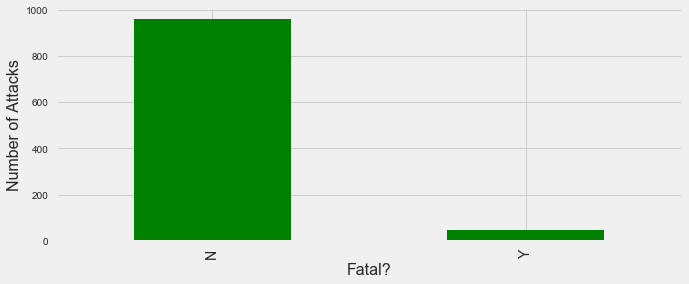

In [88]:
ax = shark['Fatal'].value_counts().plot(kind='bar', figsize=(10,4), color='green');
ax.set_ylabel('Number of Attacks', fontsize=16);
ax.set_xlabel('Fatal?', fontsize=16);
ax.tick_params(axis='x', labelsize=14)
shark['Fatal'].value_counts()

### 95.19% of attacks are Non-Fatal. This is the benchmark for our model.

#### Plotted correlation as a test (even though it's categorical data), just to see if anything stood out.

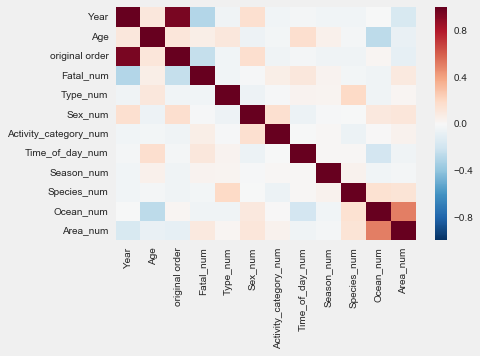

In [89]:
sns.heatmap(shark.corr())

#### Separating Fatal and Nonfatal into two variables, so they can be stacked in a graph.

In [90]:
shark.loc[shark['Fatal'].str.contains('N', case=False), 'Fatal_N'] = 1
shark.loc[shark['Fatal'].str.contains('Y', case=False), 'Fatal_N'] = 0
shark.loc[shark['Fatal'].str.contains('Y', case=False), 'Fatal_Y'] = 1
shark.loc[shark['Fatal'].str.contains('N', case=False), 'Fatal_Y'] = 0
shark[['Fatal', 'Fatal_N', 'Fatal_Y']].tail(10)

,Fatal,Fatal_N,Fatal_Y
4824,Y,0.0,1.0
5006,N,1.0,0.0
5182,N,1.0,0.0
5235,Y,0.0,1.0
5240,Y,0.0,1.0
5419,Y,0.0,1.0
5546,Y,0.0,1.0
5557,Y,0.0,1.0
5767,Y,0.0,1.0
5857,N,1.0,0.0


#### Gender Breakdown 
#### Fatality: Even. 4% Female, 5% Male




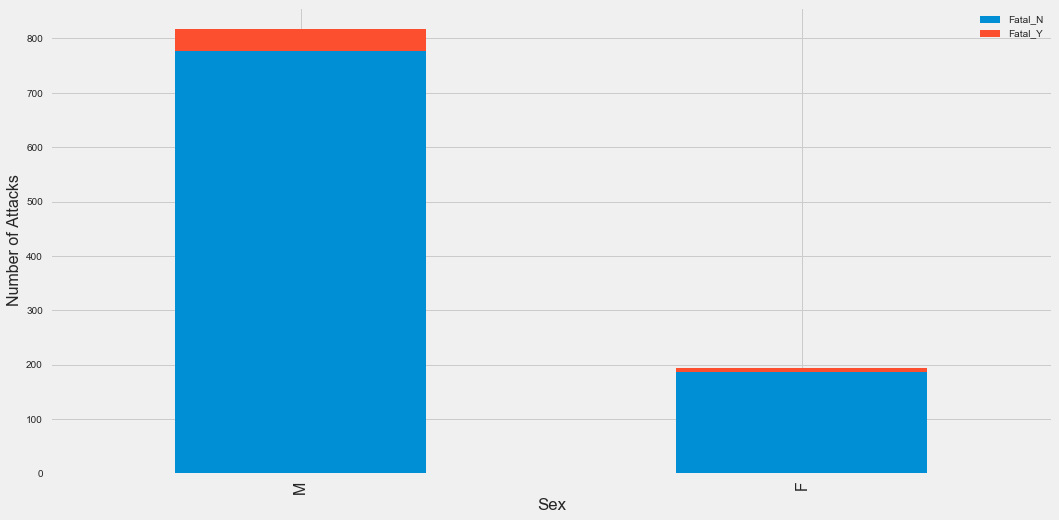

In [91]:
shark_sex = shark[['Sex', 'Fatal_N', 'Fatal_Y']]

ax = shark_sex.groupby('Sex').sum().sort_values('Fatal_Y', ascending=False).plot(kind='bar', figsize=(16,8), stacked=True);
ax.set_ylabel('Number of Attacks', fontsize=16);
ax.tick_params(axis='x', labelsize=16)


#### Age Breakdown 
#### Fatality: Generally increasing with age. Under 10 2%, 10-29 4%, 30-49 5%, 50-69 8%, and 70-89 17%.


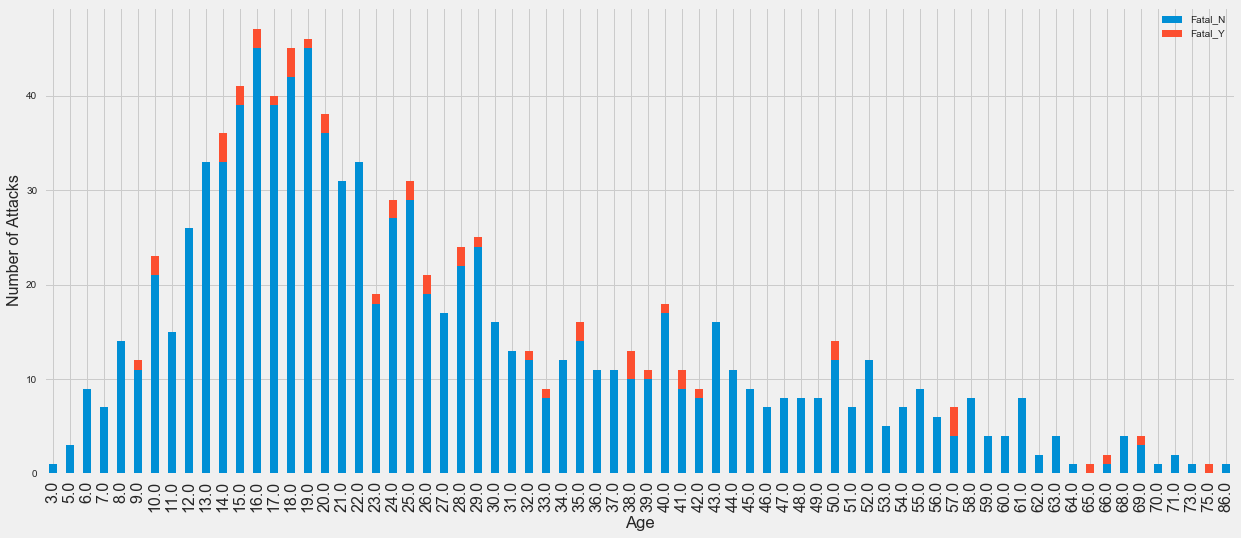

In [92]:
shark_age = shark[['Age', 'Fatal_N', 'Fatal_Y']]

ax = shark_age.groupby('Age').sum().plot(kind='bar', figsize=(19,8), stacked=True);
ax.set_ylabel('Number of Attacks', fontsize=16);
ax.tick_params(axis='x', labelsize=16)

#### Type Breakdown 
#### Fatality: Provoked attacks have favorable outcome. Provoked 2% fatality, Unprovoked 5%


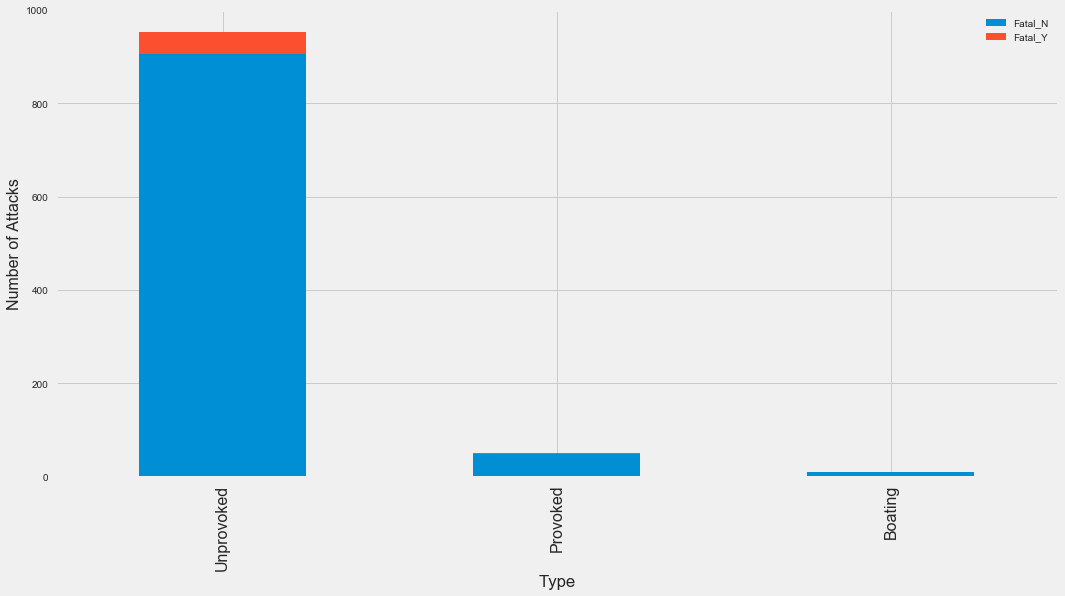

In [93]:
shark_type = shark[['Type', 'Fatal_N', 'Fatal_Y']]

ax = shark_type.groupby('Type').sum().sort_values('Fatal_Y', ascending=False).plot(kind='bar', figsize=(16,8), stacked=True);
ax.set_ylabel('Number of Attacks', fontsize=16);
ax.tick_params(axis='x', labelsize=16)

#### Activity Breakdown 
#### Fatality: Highest fatality for Other (18%) and Snorkeling (10%), lowest for surfing (1%) and boating (0%)


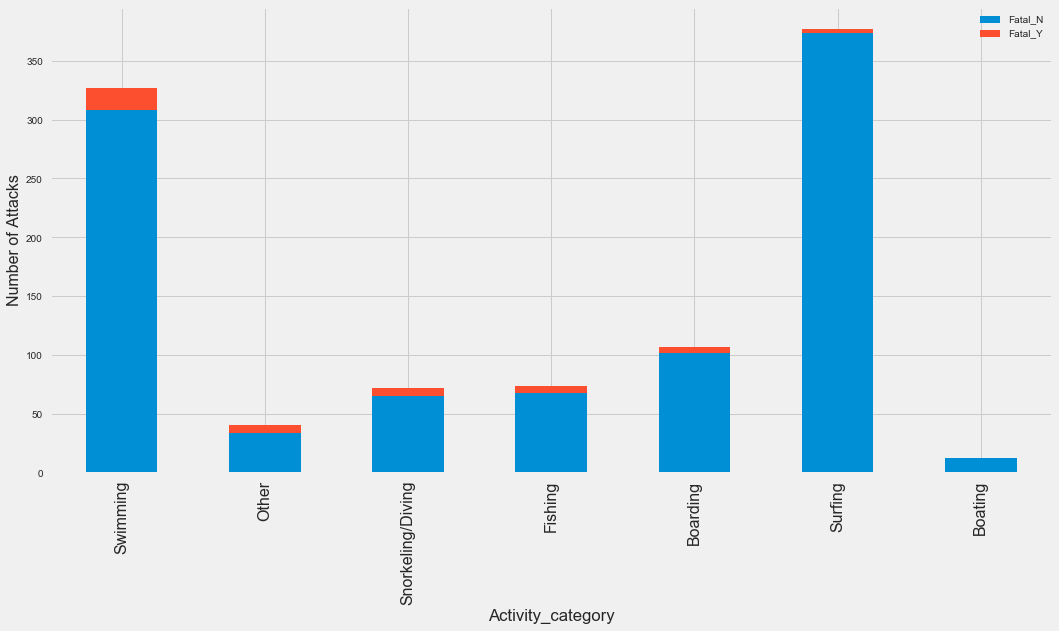

In [94]:
shark_activity = shark[['Activity_category', 'Fatal_N', 'Fatal_Y']]

ax =shark_activity.groupby('Activity_category').sum().sort_values('Fatal_Y', ascending=False).plot(kind='bar', figsize=(16,8), stacked=True);
ax.set_ylabel('Number of Attacks', fontsize=16);
ax.tick_params(axis='x', labelsize=16)

#### Time Breakdown 
#### Fatality: Darker hours most dangerous. Night 24% fatality, Early morning 10% fatality.


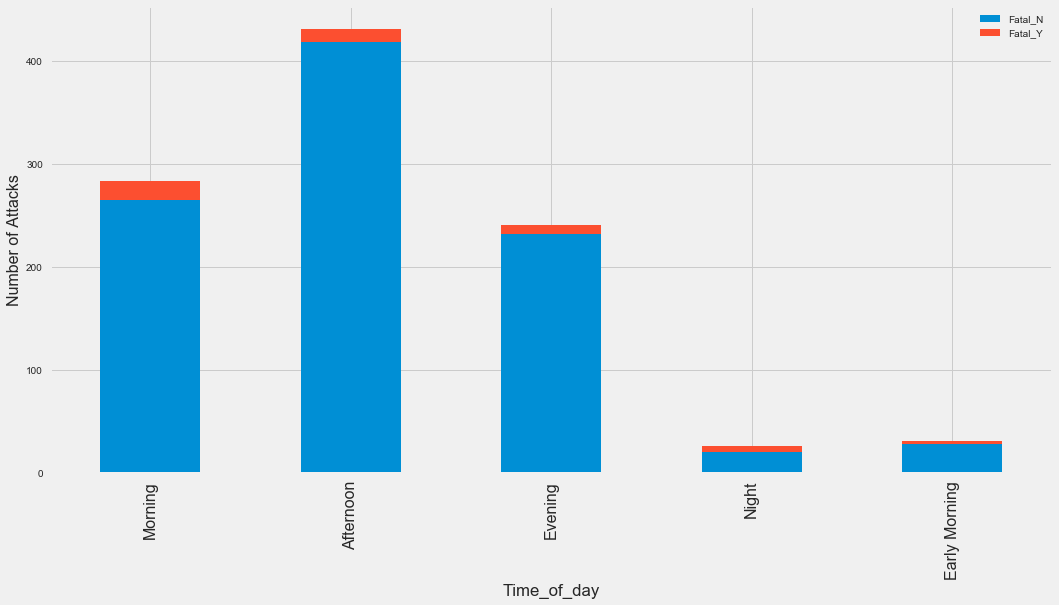

In [95]:
shark_time = shark[['Time_of_day', 'Fatal_N', 'Fatal_Y']]

ax = shark_time.groupby('Time_of_day').sum().sort_values('Fatal_Y', ascending=False).plot(kind='bar', figsize=(16,8), stacked=True);
ax.set_ylabel('Number of Attacks', fontsize=16);
ax.tick_params(axis='x', labelsize=16)

#### Season Breakdown 
#### Fatality: Colder months have highest probability of deadly attack. Winter 11%, Spring 3%, Summer 6%, and Fall 4%.


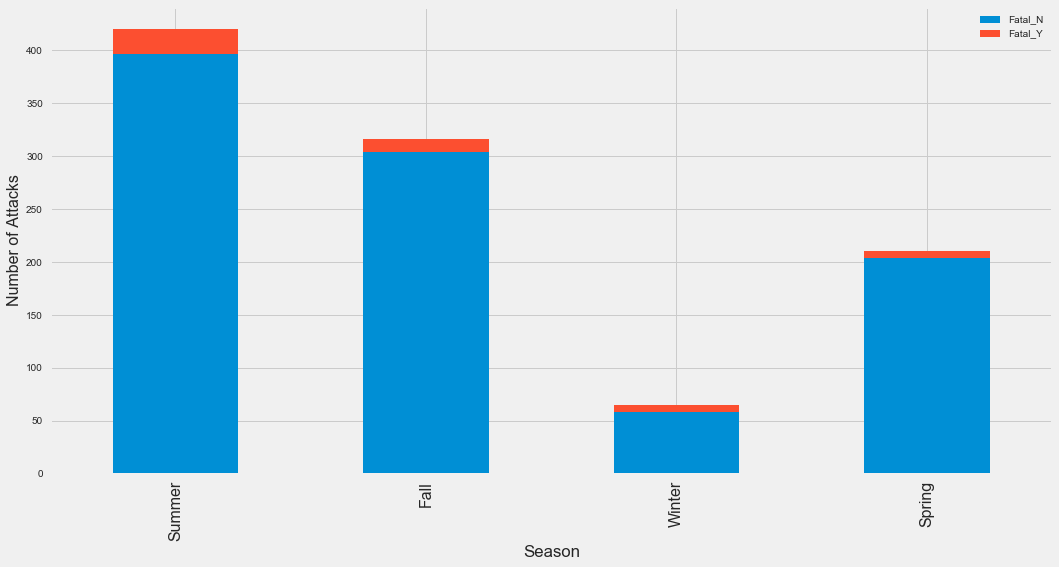

In [96]:
shark_season = shark[['Season', 'Fatal_N', 'Fatal_Y']]

ax = shark_season.groupby('Season').sum().sort_values('Fatal_Y', ascending=False).plot(kind='bar', figsize=(16,8), stacked=True);
ax.set_ylabel('Number of Attacks', fontsize=16);
ax.tick_params(axis='x', labelsize=16)

#### Species Breakdown 
#### Fatality: Most attacks have no Species listed, but only 3% are fatal. Mako Sharks have 14%, White Sharks have 13%, Bull Sharks have 10%, Tiger Sharks have 9%, and Hammerheads have 6%. All other species listed have 0 fatalities.


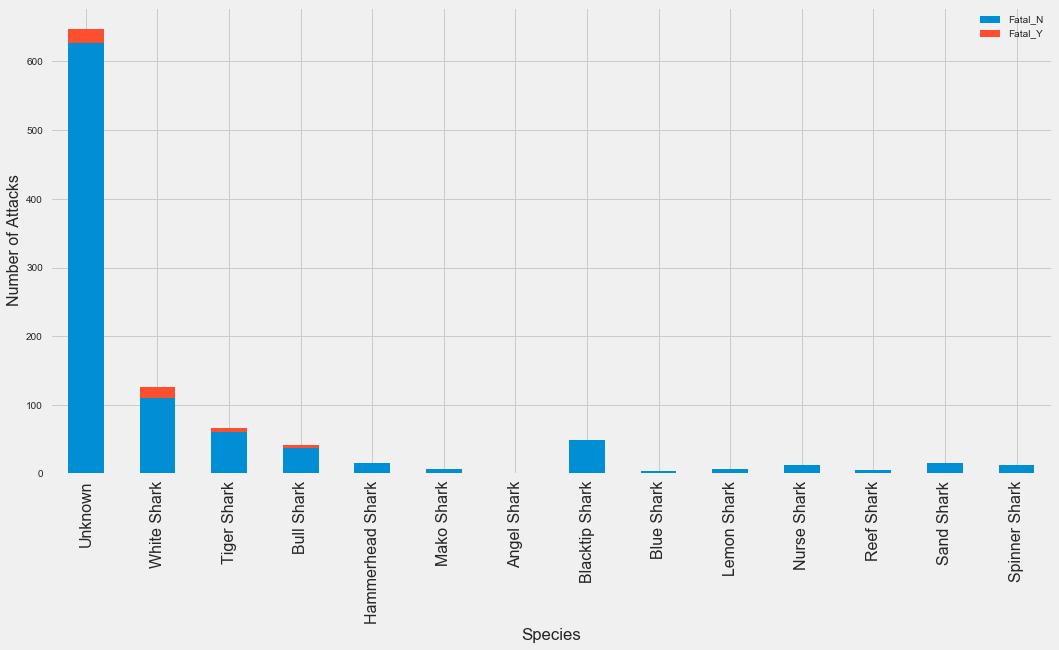

In [97]:
shark_species = shark[['Species', 'Fatal_N', 'Fatal_Y']]

ax = shark_species.groupby('Species').sum().sort_values('Fatal_Y', ascending=False).plot(kind='bar', figsize=(16,8), stacked=True);
ax.set_ylabel('Number of Attacks', fontsize=16);
ax.tick_params(axis='x', labelsize=16)

#### Ocean Breakdown 
#### Fatality: Even though most attacks in Gulf, Atlantic and Pacific have a 9% fatality chance, and the Gulf is 2%.


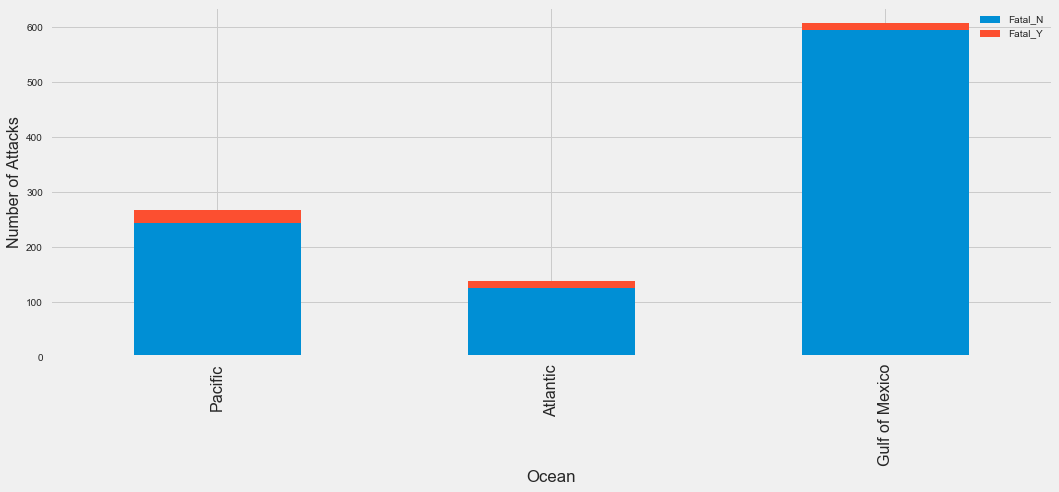

In [98]:
shark_ocean = shark[['Ocean', 'Fatal_N', 'Fatal_Y']]

ax = shark_ocean.groupby('Ocean').sum().sort_values('Fatal_Y', ascending=False).plot(kind='bar', figsize=(16,6), stacked=True);
ax.set_ylabel('Number of Attacks', fontsize=16);
ax.tick_params(axis='x', labelsize=16)

#### State Breakdown 
#### Fatality: States with most attacks are FL (2% fatal), CA (11% fatal), HI (9% fatal). States like SC has 0% fatality and MD has 100% fatality, but other only have 1 attack in the dataset.


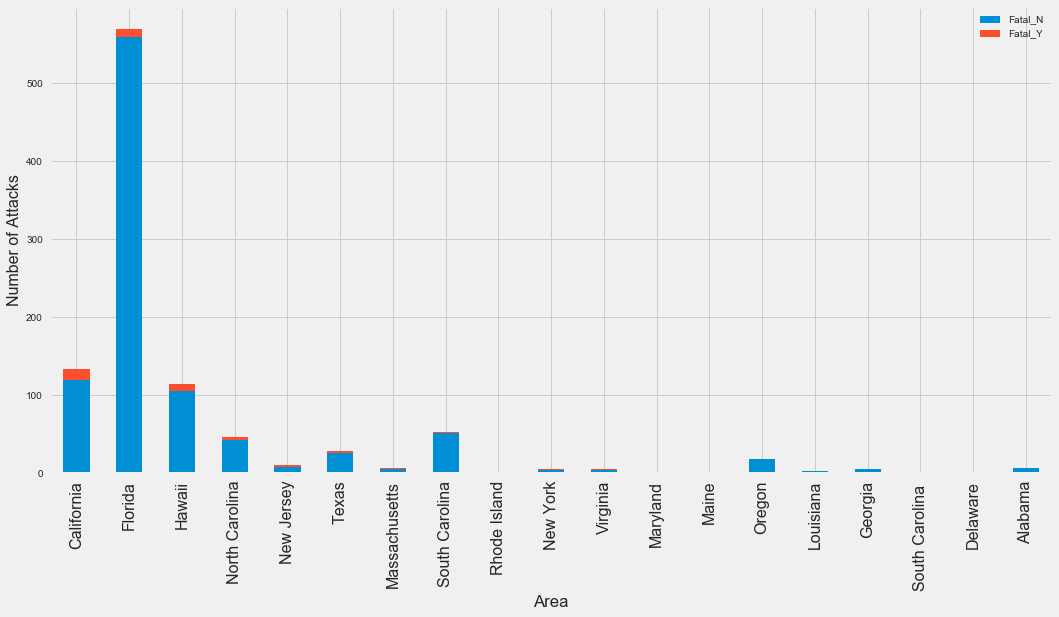

In [99]:
shark_area = shark[['Area', 'Fatal_N', 'Fatal_Y']]

ax = shark_area.groupby('Area').sum().sort_values('Fatal_Y', ascending=False).plot(kind='bar', figsize=(16,8), stacked=True);
ax.set_ylabel('Number of Attacks', fontsize=16);
ax.tick_params(axis='x', labelsize=16)